                      Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
                                            
####                 Отчет по лабораторной работе "Численное решение систем линейных уравнений, численное интегрирование"

                                              
                                                 Вариант 2
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                       Выполнила: Зибаова Александра, 430 гр.
                                                                       Проверил: Шиндин А. В.

                                         Нижний Новгород, 2016 год.
                                    

###  Содержание
1. Постановка задачи
2. Цели работы
3. Описание используемых алгоритмов
4. Исходный код программы
5. Результаты работы программы
6. Анализ результатов 


###   1. Постановка задачи.
1. Выбрать свой вариант системы (номер варианта остается с предыдущей лабораторной работы). Кроме самой системы в варианте должны быть указаны:
 * число уравнений системы
 * требуемый метод/методы решения системы
 * необходимая относительная точность решения системы
 * требуемый метод вычисления интеграла
 * необходимая относительная точность вычисления интеграла (если не указана, то брать — 0,01).

2.  Вычислить определенный интеграл двумя методами
 * Заданным методом
 * С помощью функции numpy.trapz(…), графически провести сравнение с результатами предыдущего метода. Разницу объяснить.

3. Построить график подынтегральной функции, а также график зависимости значения интеграла от номера итерации предлагаемого метода численного интегрирования.

4. Решить систему заданным методом 
 * Для 1000 уравнений
 * Для 10000 уравнений

5. Построить график решения X(i), а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы.

6. Решить систему с помощью функции numpy.linalg.solve(…). Результат графически сравнить с решением, полученным в пункте 4. Разницу объяснить.

###   2. Цель работы
* Освоить методы численного интегрирования. Вычислить определенный интеграл с использованием **рекуррентной формулы Буля** с относительной точностью **0,01**
* Научиться численно решать системы линейных уравнений. Решение систему из 1000 и 10000 уравнений **методом прогонки** и **методом Гаусса-Зейделя** с относительной точностью **0,001**.

## Рассматриваемая система уравнений имеет вид:
$$x_1=0.1*x_2$$
$$(2*i+1)*x_{i-1}-(6*i^2+3)*x_i+(4*i+2)*x_{i+1}=\int_{0}^{1}\frac{e^{-i^2*t}}{1+i*t*sin(t)^2}\,dt, i=2,3,\ldots,n$$
$$x_n=0.5*x_{n-1}$$


###   3. Описание используемых алгоритмов
#### 3.1 Вычисление определенного интеграла методом Буля
Вычисляемый интеграл можно рассматривать как оператор, имеющий областью определения пространство $H_{[a,b]}$, а областью значений пространство $R_1$.
$$A[f]=\int\limits_a^b f(x)\,dx$$
Тогда оператор $A$ можно аппроксимировать последовательностью конечноразмерных операторов $A_n$, имеющих областью определения пространство $R_n$, а областью значений пространство $R_1$
Выбирая в качестве интерполяционного многочлена многочлен Лагранжа, будем иметь:
$$\int_a^b f(x)\,dt=\sum_{k=0}^nC_k^{(n)}f(x_k^{(n)})+R_n[f],$$ где
Kвадратурная формула Ньютона-Котеса:
$$C_k^{(n)}=\int_a^b \prod_{i=0,i\ne k}^n {\frac {x-x_i^{(n)}} {x_k^{(n)}-x_i^{(n)}}} \,dx$$ 
остаточный член:
$$R_n[f]=\frac {f^{(n+1)}(\zeta)} {(n+1)!} \int_a^b\prod_{i=0}^n (x-x_i^{(n)}) \,dx$$ 
                                     **В квадратурной формуле Буля:**
$$\sum\_{k=0}^4 C_k^{(4)}f(x_k^{(4)})=\frac {\beta-\alpha} 90 (7f(\alpha)+32f(\frac {3\alpha+\beta} 4) + 12f(\frac {\alpha+\beta} 2)+32f(\frac {\alpha+3\beta} 4)+7f(\beta))$$
$$R_4[f]\le max_{x\in [\alpha,\beta]} |f^{(7)}(x)| \frac {8(\alpha-\beta)^7} {945}$$

#### 3.2 Решение системы уравнений
Для ускорения работы программы удобно использовать матричные операторы. Поэтому сначала составим матрицы, содержащие коэффициенты системы, а также вектор-столбец, содержащий правые части этих уравнений - посчитанные с помощью рекуррентной формулы Буля интегралы. 
#### 3.2.1 Решение системы уравнений методом прогонки
**Метод прогонки** относится к прямым методам решения алгебраических систем, то есть к таким методам, при которых совершается конечное, известное заранее количество математических операций. В таких методах точность определяется лишь точностью арифметических вычислений, а суть их сводится к исключению переменных. 
Он используется для решения систем с трехдиагональной матрицей.
В этом случае можно записать
$$x_{i-1}=L_ix_i+M_i, i=2,3,\ldots,n$$
Причем $L_2=-\frac{c_1}{d_1}$ и $M_2=\frac{b_1}{d_1}$
Откуда $$x_n=\frac{b_n-M_na_n}{L_na_n+d_n}$$
$$x_i=\frac{b_i+M_ia_i-x_ic_i}{a_iL_i+d_i}$$


#### 3.2.2 Решение системы уравнений методом Гаусса-Зейделя
Метод Гаусса-Зейделя является итерационным. Суть его в следующем.
Представим матрицу $A$ в виде $A=L+D+R$, где $L$ - нижняя треугольная матрица с нулевыми диагональными элементами, $D$ - даигональная матрица, $R$ - верхняя треугольная матрица
Тогда можно показать, что $$x^{k+1}=-(D+L)^{-1}Rx^k+(D+L)^{-1}b$$

###   4. Исходный код программы

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as integrate
import numpy.linalg as lin
%matplotlib inline

In [2]:
def f(x,j):
    return math.exp(-x*j**2)/(1+j*x*math.sin(x**2))
k=int(input('nomer yravneniya'))
def fst(x):
    return f(x,k)
xst = np.arange(0,1,0.01)
yst = [fst(l) for l in xst]


nomer yravneniya7


In [10]:
def summ(p,k):
    tz=0; e=0; Integ=0
    for o in range(0,p):
        tz=o/p
        e+=1/p
        Integ+=(e-tz)/90*(7*f(tz,k)+32*f((3*tz+e)/4,k)+12*f((tz+e)/2,k)+32*f((tz+3*e)/4,k)+7*f(e,k))
    return Integ  

def integral(k):
    N=2
    p=summ(1,k)
    while math.fabs((summ(N,k)-summ(N-1,k))/summ(N-1,k))>0.01:
        N=N+1
        p=summ(N-1,k)
    print('Номер интерации: ',N)
    return p    
def integral1(k):
    N=2
    p=summ(1,k)
    while math.fabs((summ(N,k)-summ(N-1,k))/summ(N-1,k))>0.01:
        N=N+1
        p=summ(N-1,k)
    return p   

In [4]:
NTR=np.trapz(yst, x=None, dx=0.01)

In [12]:
N=int(input('kolichestvo yravnenyi sistemy'))
#Коэффициенты уравнений#
A=np.zeros((N,N))
A1=np.zeros((N,3))
A[0,0]=A1[0,1]=1
A[0,1]=A1[0,2]=-0.1
A[N-1,N-1]=A1[N-1,1]=-1
A[N-1,N-2]=A1[N-1,0]=0.5
for i in range (2,N):
    A[i-1,i-2]=A1[i-1,0]=2*i+1
    A[i-1,i-1]=A1[i-1,1]=-6*i**2-3
    A[i-1,i]=A1[i-1,2]=4*i+2
#Правые части уравнений#    

B=np.zeros((N))
for i in range (2,N):
    B[i-1]=integral1(i)
def f2(x):
    return f(x,7)
S= integrate.quad(f2,0,1)   

kolichestvo yravnenyi sistemy1000


In [25]:
L=np.zeros((N))
M=np.zeros((N))
Xprog=np.zeros((N))
L[1]=-A1[0,2]/A1[0,1]
M[1]=B[0]/A1[0,1]
for i in range (2,N):
    L[i]=-A1[i-1,2]/(A1[i-1,0]*L[i-1]+A1[i-1,1])
    M[i]=(B[i-1]-M[i-1]*A1[i-1,0])/(A1[i-1,0]*L[i-1]+A1[i-1,1])
Xprog[N-1]=(B[N-1]-M[N-1]*A1[N-1,0])/(L[N-1]*A1[N-1,0]+A1[N-1,1])
for i in range (1,N):
    Xprog[N-i-1]=L[N-i]*Xprog[N-i]+M[N-i]

In [13]:
Ln=np.zeros((N,N))
D=np.zeros((N,N))
for i in range (0,N):
    D[i,i]=A[i,i]
for i in range(0,N):
    for j in range (0,i):
        Ln[i,j]=A[i,j]
R=A-D-Ln
H=D+Ln
Hi=lin.inv(H)
Bt=np.zeros((N,1))
for i in range(0,N):
    Bt[i,0]=B[i]
k1=np.dot(Hi,Bt)
k2=-np.dot(Hi,R)

In [14]:

Xgz0=np.zeros((N,1))
iter_GZ=int(input('iterazii'))
Norm=[]
nor0=0; konets=0
for i in range(0,iter_GZ):
    Xgz =np.dot(k2,Xgz0)+k1
    nor=lin.norm(Xgz)
    Norm.append(nor)
    if (nor-nor0)/nor<0.001:
        break
    else:    
        nor0=nor
        Xgz0=Xgz
        konets=i     

iterazii10000


In [15]:
Xpy=lin.solve(A,B)

###   5. Результат работы программы
* Для вычисления интеграла

График подынтегральной функции для выбранного интеграла


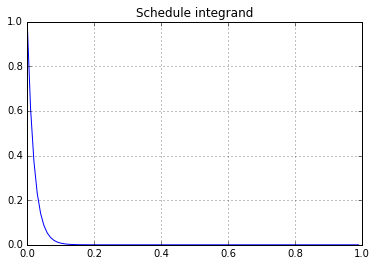

График зависимости значения интеграла от номера итерации в методе Буля
Зависимость интеграла от номера итерации


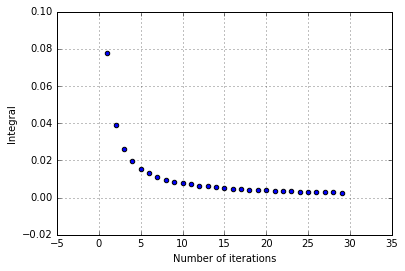

Номер интерации:  8
Значение интеграла:  0.02080123184554507
Значение интеграла в результате вычисления с помощью numpy.trapz
0.0208076364541


In [16]:
print(('График подынтегральной функции для выбранного интеграла'))
plt.plot(xst,yst)
plt.title('Schedule integrand')
plt.grid()
plt.show()
print(('График зависимости значения интеграла от номера итерации в методе Буля'))
v=np.arange(1,30,1)
c=[summ(s,10000) for s in v]#введи здесь номер интеграла
print('Зависимость интеграла от номера итерации')
plt.scatter(v,c)
plt.xlabel('Number of iterations')
plt.ylabel('Integral')
plt.title('')
plt.grid()
plt.show()
print ('Значение интеграла: ',integral(k))
print('Значение интеграла в результате вычисления с помощью numpy.trapz')
print(NTR)

* Для системы уравнений

График решения X(i)


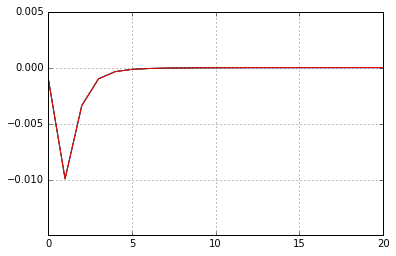

Или, при увеличении масштаба:


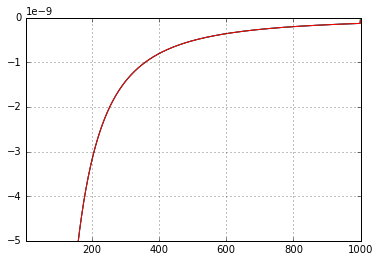

График зависимости нормы решения от номера итерации:


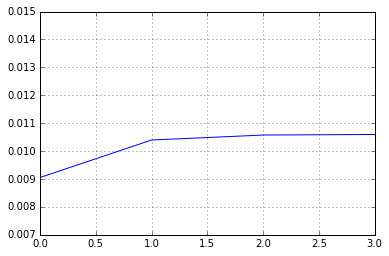

In [26]:
print(('График решения X(i)'))
plt.plot(Xpy)
plt.plot(Xprog)
plt.plot(Xgz0)
plt.axis([0, 20, min(Xpy)-0.005, max(Xpy)+0.005])
plt.grid()
plt.show()
print(('Или, при увеличении масштаба:'))
plt.plot(Xpy)
plt.plot(Xprog)
plt.plot(Xgz0)
plt.axis([5, 1000, -0.000000005, 0])
plt.grid()
plt.show()
print(('График зависимости нормы решения от номера итерации:'))
plt.plot(Norm)
plt.axis([0, konets, 0.007, 0.015])
plt.grid()
plt.show()

###   6. Анализ результатов
* Результаты вычисления интеграла методом Буля и с помощью встроенной функции numpy.trapz совпадают в точностью до 3 знака после запятой. Это связано с тем, что встроенная функция вычисляет интеграл с помощью формулы трапеций, в которой используется интерполяционный многочлен Лагранжа второго порядка, тогда как в формуле Буля интерполяция производилась многочленом четвертого порядка. 
* Результаты решения системы, полученные методом прогонки и вычисленные с помощью встроенной функции совпадают c точностью до $10^{-17}$. Результат, полученный итерационным методом Гаусса-Зейделя, совпадает с ними c точностью до $10^{-7}$. Дополнительной проверкой правильности выведенного результата служит его подстановка в уравнение. 

In [27]:
print('разница при решении методом прогонки и встроенной функцией')
print(lin.norm(Xpy-Xprog))
print('разница при решении методом Гаусса-Зейделя и встроенной функцией')
Transp=Xgz.transpose()
print(lin.norm(Transp-Xpy))
print('проверка верности решения путем подстановки в уравнение')
print(lin.norm(np.dot(A,Xprog)-B))

разница при решении методом прогонки и встроенной функцией
6.49880622636e-11
разница при решении методом Гаусса-Зейделя и встроенной функцией
3.2217444495e-07
проверка верности решения путем подстановки в уравнение
6.49663525645e-11
